# Análise Exploratória de Dados

## 1. Conexão com o banco de dados

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# Definição de função para conectar ao banco de dados.
# A conexão está dentro de uma transaction, por isso é necessário encerrar a transaction aberta com commit.
def connect_to_database(sgbd, user, password, host, port, database):
    try:
        engine = create_engine(f"{sgbd}://{user}:{password}@{host}:{port}/{database}")
        conn = engine.connect()
        conn.execute("COMMIT")
        return conn, engine
    except Exception as error:
        print(error)

In [3]:
# Estabelecimento de conexão com o database olist.
conn, engine = connect_to_database('postgresql', 'postgres', 'postgres', 'localhost', '5433', 'olist')

## 2. Análise descritiva das tabelas

### 2.1. Tabela customers

In [4]:
query =  """
SELECT * FROM customers
"""
customers = pd.read_sql_query(query, con=engine)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Colunas da tabela e quantidade de valores não nulos.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Quantidade de cidades (customer_city) distintas.
query =  """
SELECT
    COUNT(customer_city)
FROM (
    SELECT DISTINCT
        customer_city
    FROM customers)
"""
pd.read_sql_query(query, con=engine)

,count
0,4119


In [7]:
# 10 cidades com as maiores quantidades de clientes.
# A coluna customer_unique_id identifica cada cliente, enquanto a coluna customer_id é chave estrangeira para tabela orders.
# Cada pedido possui um único customer_id.
query =  """
SELECT
    customer_city,
    COUNT(customer_city)
FROM (
SELECT DISTINCT
    customer_unique_id,
    customer_city,
    customer_state
FROM customers)
GROUP BY customer_city
ORDER BY COUNT(customer_city) DESC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,customer_city,count
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
5,campinas,1398
6,porto alegre,1326
7,salvador,1209
8,guarulhos,1153
9,sao bernardo do campo,908


In [8]:
# Quantidade de estados (customer_state) distintos.
query =  """
SELECT
    COUNT(customer_state)
FROM (
    SELECT DISTINCT
        customer_state
    FROM customers)
"""
pd.read_sql_query(query, con=engine)

,count
0,27


In [9]:
# 5 estados com as maiores quantidades de clientes.
query =  """
SELECT
    customer_state,
    COUNT(customer_unique_id)
FROM (
SELECT DISTINCT
    customer_unique_id,
    customer_city,
    customer_state
FROM customers)
GROUP BY customer_state
ORDER BY COUNT(customer_unique_id) DESC
LIMIT 5
"""
pd.read_sql_query(query, con=engine)

,customer_state,count
0,SP,40345
1,RJ,12396
2,MG,11269
3,RS,5280
4,PR,4887


- A tabela customers possui 5 colunas e 99441 registros distintos, sendo que:
    - 3 colunas são utilizadas para identificar a localização do cliente (customer_zip_code_prefix, customer_city e customer_state);
    - a coluna customer_unique_id identifica cada cliente;
    - a coluna customer_id é chave estrangeira para tabela orders (cada pedido possui um único customer_id);
    - não há valores nulos em quaisquer das colunas.
- Os clientes estão localizados em 4119 cidades distintas, distribuídas por todos os estados da federação, inclusive o Distrito Federal.
- A maioria dos clientes encontra-se nas capitais São Paulo, Rio de Janeiro e Belo Horizonte.

### 2.2. Tabela sellers

In [10]:
query =  """
SELECT * FROM sellers
"""
sellers = pd.read_sql_query(query, con=engine)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
# Colunas da tabela e quantidade de valores não nulos.
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [12]:
# Quantidade de cidades (seller_city) distintas.
query =  """
SELECT
    COUNT(seller_city)
FROM (
    SELECT DISTINCT
        seller_city
    FROM sellers)
"""
pd.read_sql_query(query, con=engine)

,count
0,611


In [13]:
# 10 cidades com as maiores quantidades de vendedores.
query =  """
SELECT
    seller_city,
    COUNT(seller_id)
FROM sellers
GROUP BY seller_city
ORDER BY COUNT(seller_id) DESC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,seller_city,count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [14]:
# Quantidade de estados (seller_state) distintos.
query =  """
SELECT
    COUNT(seller_state)
FROM (
    SELECT DISTINCT
        seller_state
    FROM sellers)
"""
pd.read_sql_query(query, con=engine)

,count
0,23


In [15]:
# 5 estados com as maiores quantidades de vendedores.
query =  """
SELECT
    seller_state,
    COUNT(seller_id)
FROM sellers
GROUP BY seller_state
ORDER BY COUNT(seller_id) DESC
LIMIT 5
"""
pd.read_sql_query(query, con=engine)

,seller_state,count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171


- A tabela customers possui 4 colunas e 3095 registros distintos, sendo que:
    - 3 colunas são utilizadas para identificar a localização do vendedor (seller_zip_code_prefix, seller_city e seller_state);
    - a coluna seller_id identifica cada vendedor;
    - não há valores nulos em quaisquer das colunas.
- Os vendedores estão localizados em 611 cidades distintas, distribuídas por 23 estados da federação.
- A maioria dos vendedores encontra-se nas capitais São Paulo, Curitiba e Rio de Janeiro.

### 2.3. Tabela products

In [16]:
query = """
SELECT * FROM products
"""
products = pd.read_sql_query(query, con=engine)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
# Colunas da tabela e quantidade de valores não nulos.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
query = """
SELECT
    COUNT(*)
FROM (
SELECT DISTINCT
    product_category_name
FROM products)
"""
pd.read_sql_query(query, con=engine)

,count
0,74


In [19]:
query = """
SELECT
    product_category_name,
    COUNT(product_id)
FROM products
WHERE product_category_name IS NOT NULL
GROUP BY product_category_name
ORDER BY COUNT(product_id) DESC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,product_category_name,count
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
5,automotivo,1900
6,informatica_acessorios,1639
7,brinquedos,1411
8,relogios_presentes,1329
9,telefonia,1134


- A tabela products possui 9 colunas e 32950 registros.
- Há valores nulos em todas as colunas, exceto na coluna product_id, obviamente.
- A única variável categórica é product_category name, que possui 74 valores distintos.
- As demais colunas são numéricas e indicam as dimensões físicas e peso do produto, além de dados sobre os campos de anúncio e quantidade de fotos.

### 2.4. Tabelas orders, order_items, order_payments e order_reviews

Todas essas tabelas referem-se aos pedidos efetivados. Elas trazem informações sobre datas, itens, pagamentos e avaliações dos pedidos.

#### 2.4.1. Tabela orders

In [20]:
query = """
SELECT * FROM orders
"""
orders = pd.read_sql_query(query, con=engine)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
# Colunas da tabela e quantidade de valores não nulos.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
# Valores distintos da coluna order_status
query = """
SELECT DISTINCT
    order_status
FROM orders
"""
pd.read_sql_query(query, con=engine)

,order_status
0,shipped
1,unavailable
2,invoiced
3,created
4,approved
5,processing
6,delivered
7,canceled


#### 2.4.2. Tabela order_items

In [23]:
query = """
SELECT * FROM order_items
"""
order_items = pd.read_sql_query(query, con=engine)
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
# Colunas da tabela e quantidade de valores não nulos.
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### 2.4.3. Tabela order_payments

In [25]:
query = """
SELECT * FROM order_payments
"""
order_payments = pd.read_sql_query(query, con=engine)
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
# Colunas da tabela e quantidade de valores não nulos.
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
# Valores distintos da coluna payment_type
query = """
SELECT DISTINCT
    payment_type
FROM order_payments
"""
pd.read_sql_query(query, con=engine)

,payment_type
0,not_defined
1,boleto
2,debit_card
3,voucher
4,credit_card


#### 2.4.4. Tabela order_reviews

In [28]:
query = """
SELECT * FROM order_reviews
"""
order_reviews = pd.read_sql_query(query, con=engine)
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
# Colunas da tabela e quantidade de valores não nulos.
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


## 3. Perguntas

### 3.1. Qual a quantidade de produtos vendidos por mês? E o faturamento mensal?

A tabela orders contém o ID de cada pedido (order_id), o ID do cliente (customer_id), a situação do pedido e as datas de compra, aprovação do pagamento, entrega ao transportador, entrega ao cliente e estimativa da data de entrega.

Para efetuar a análise da quantidade de produtos vendidos por mês, vamos considerar os pedidos que tiveram o pagamento aprovado, ou seja, aqueles com a coluna order_approved_at preenchida.

A quantidade de produtos vendidos é obtida da tabela order_items. Nessa tabela, há uma linha para cada unidade de produto constante do pedido.

In [30]:
# Quantidade e valor dos produtos vendidos por mês.
query = """
WITH order_quantity_amount AS (
    SELECT
        order_id,
        COUNT(product_id) quantity,
        SUM(price) amount
    FROM order_items
    GROUP BY order_id)
SELECT
    DATE_PART('YEAR', CAST(order_approved_at AS TIMESTAMP))::INTEGER AS year,
    DATE_PART('MONTH', CAST(order_approved_at AS TIMESTAMP))::INTEGER AS month,
    SUM(quantity)::INTEGER total_quantity,
    SUM(amount) total_value
FROM orders o
LEFT JOIN order_quantity_amount oqa ON o.order_id = oqa.order_id
WHERE order_approved_at IS NOT NULL
GROUP BY year, month
ORDER BY year ASC, month ASC
"""
pd.read_sql_query(query, con=engine)

,year,month,total_quantity,total_value
0,2016,9,3,134.97
1,2016,10,366,49640.05
2,2016,12,1,10.90
3,2017,1,908,114860.71
4,2017,2,1931,247441.08
5,2017,3,3022,370611.56
6,2017,4,2655,357638.73
7,2017,5,4130,507167.89
8,2017,6,3602,437278.58
9,2017,7,4464,492766.06


### 3.2. Qual é o valor do ticket médio mensal?

In [31]:
query = """
SELECT
    *,
    ROUND(CAST(total_value AS NUMERIC)/CAST(total_orders AS NUMERIC), 2) average_ticket
FROM (SELECT
    DATE_PART('YEAR', CAST(order_approved_at AS TIMESTAMP))::INTEGER AS year,
    DATE_PART('MONTH', CAST(order_approved_at AS TIMESTAMP))::INTEGER AS month,
    COUNT(o.order_id) total_orders,
    SUM(amount) total_value
FROM orders o
LEFT JOIN (
    SELECT
        order_id,
        SUM(price) amount
    FROM order_items
    GROUP BY order_id) oqa
ON o.order_id = oqa.order_id 
WHERE order_approved_at IS NOT NULL
GROUP BY year, month
ORDER BY year ASC, month ASC)
"""
pd.read_sql_query(query, con=engine)

,year,month,total_orders,total_value,average_ticket
0,2016,9,1,134.97,134.97
1,2016,10,320,49640.05,155.13
2,2016,12,1,10.90,10.90
3,2017,1,760,114860.71,151.13
4,2017,2,1765,247441.08,140.19
5,2017,3,2689,370611.56,137.83
6,2017,4,2374,357638.73,150.65
7,2017,5,3693,507167.89,137.33
8,2017,6,3252,437278.58,134.46
9,2017,7,3974,492766.06,124.00


### 3.3. Quais as categorias de produtos mais vendidas?

In [32]:
query = """
SELECT
    p.product_category_name,
    COUNT(o.product_id) quantity_products_sold
FROM order_items o
LEFT JOIN products p ON o.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY quantity_products_sold DESC
LIMIT 20
"""
pd.read_sql_query(query, con=engine)

,product_category_name,quantity_products_sold
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


#### 3.4. Qual é o valor do ticket médio por categoria de produto?

In [33]:
query = """
SELECT
    *,
    ROUND(CAST(total_sales_value AS NUMERIC)/CAST(quantity_products_sold AS NUMERIC), 2) average_ticket
FROM (
    SELECT
        p.product_category_name,
        COUNT(o.product_id) quantity_products_sold,
        SUM(price) total_sales_value
    FROM order_items o
    LEFT JOIN products p ON o.product_id = p.product_id
    GROUP BY p.product_category_name
    ORDER BY quantity_products_sold DESC
    LIMIT 20 )
"""
pd.read_sql_query(query, con=engine)

,product_category_name,quantity_products_sold,total_sales_value,average_ticket
0,cama_mesa_banho,11115,1036988.68,93.30
1,beleza_saude,9670,1258681.34,130.16
2,esporte_lazer,8641,988048.97,114.34
3,moveis_decoracao,8334,729762.49,87.56
4,informatica_acessorios,7827,911954.32,116.51
5,utilidades_domesticas,6964,632248.66,90.79
6,relogios_presentes,5991,1205005.68,201.14
7,telefonia,4545,323667.53,71.21
8,ferramentas_jardim,4347,485256.46,111.63
9,automotivo,4235,592720.11,139.96


### 3.5. Quais são os melhores vendedores? De que cidade e estado eles são?

Os 10 melhores vendedores considerando a quantidade total vendida.

In [34]:
query = """
SELECT
    o.seller_id,
    s.seller_city,
    s.seller_state,
    COUNT(o.seller_id)
FROM order_items o
LEFT JOIN sellers s ON o.seller_id = s.seller_id
GROUP BY o.seller_id, s.seller_city, s.seller_state
ORDER BY COUNT(o.seller_id) DESC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,seller_id,seller_city,seller_state,count
0,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,2033
1,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1987
2,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,1931
3,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,1551
5,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,1499
6,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,1428
7,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,1364
8,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,1203
9,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,1171


Os 10 melhores vendedores considerando o valor total vendido.

In [35]:
query = """
SELECT
    o.seller_id,
    s.seller_city,
    s.seller_state,
    SUM(o.price)
FROM order_items o
LEFT JOIN sellers s ON o.seller_id = s.seller_id
GROUP BY o.seller_id, s.seller_city, s.seller_state
ORDER BY SUM(o.price) DESC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,seller_id,seller_city,seller_state,sum
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,229472.63
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,222776.05
2,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,187923.89
5,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,176431.87
6,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,160236.57
7,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,141745.53
8,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,138968.55
9,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,135171.70


### 3.6. Qual o valor do ticket médio por vendedor?
Mostrando o ticket médio dos 20 vendedores com maiores totais vendidos.

In [36]:
query = """
SELECT
    seller_id,
    seller_city,
    seller_state,
    quantity,
    total,
    ROUND(CAST(total AS NUMERIC)/CAST(quantity AS NUMERIC), 2) average_ticket
FROM (
    SELECT
        o.seller_id,
        s.seller_city,
        s.seller_state,
        COUNT(o.seller_id) quantity,
        SUM(o.price) total
    FROM order_items o
    LEFT JOIN sellers s ON o.seller_id = s.seller_id
    GROUP BY o.seller_id, s.seller_city, s.seller_state
)
ORDER BY total DESC, average_ticket DESC
LIMIT 20
"""
pd.read_sql_query(query, con=engine)

,seller_id,seller_city,seller_state,quantity,total,average_ticket
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,1156,229472.63,198.51
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,410,222776.05,543.36
2,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1987,200472.92,100.89
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,586,194042.03,331.13
4,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,1364,187923.89,137.77
5,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,340,176431.87,518.92
6,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,1551,160236.57,103.31
7,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,1171,141745.53,121.05
8,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,1428,138968.55,97.32
9,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,1499,135171.70,90.17


### 3.7. Qual o valor do ticket médio pelo estado do cliente?

In [37]:
query = """
SELECT
    *,
    ROUND(CAST(value AS NUMERIC)/CAST(quantity AS NUMERIC), 2) average_ticket
FROM (
    SELECT
        c.customer_state,
        COUNT(oi.order_id) quantity,
        SUM(oi.price) value
    FROM orders o
    LEFT JOIN customers c ON o.customer_id = c.customer_id
    LEFT JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY c.customer_state)
ORDER BY average_ticket DESC
"""
pd.read_sql_query(query, con=engine)

,customer_state,quantity,value,average_ticket
0,PB,602,1.152681e+05,191.48
1,AL,444,8.031481e+04,180.89
2,AC,92,1.598295e+04,173.73
3,RO,278,4.614064e+04,165.97
4,PA,1080,1.789478e+05,165.69
5,AP,82,1.347430e+04,164.32
6,PI,542,8.691408e+04,160.36
7,TO,315,4.962174e+04,157.53
8,RN,529,8.303498e+04,156.97
9,CE,1478,2.272547e+05,153.76


### 3.8. Quais os tipos de pagamento mais utilizados? E para os pagamentos com valores mais altos?

In [38]:
query = """
SELECT
    payment_type,
    COUNT(payment_type)
FROM order_payments
GROUP BY payment_type
ORDER BY COUNT(*) DESC
"""
pd.read_sql_query(query, con=engine)

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [39]:
query = """
SELECT
    payment_type,
    ROUND(100*CAST(quantidade AS NUMERIC)/CAST(total AS NUMERIC), 2) AS percentage
FROM (
    SELECT
        payment_type,
        COUNT(payment_type) quantidade,
        (SELECT COUNT(payment_type) FROM order_payments) total
    FROM order_payments
    GROUP BY payment_type
    ORDER BY COUNT(*) DESC)

"""
pd.read_sql_query(query, con=engine)

,payment_type,percentage
0,credit_card,73.92
1,boleto,19.04
2,voucher,5.56
3,debit_card,1.47
4,not_defined,0.00


In [40]:
# Para os valores de pagamentos mais altos, considerados aqueles maiores que $1000
query = """
SELECT
    payment_type,
    ROUND(100*CAST(quantidade AS NUMERIC)/CAST(total AS NUMERIC), 2) AS percentage
FROM (
    SELECT
        payment_type,
        COUNT(payment_type) quantidade,
        (SELECT COUNT(payment_type) FROM order_payments WHERE payment_value > 1000) total
    FROM order_payments
    WHERE payment_value > 1000
    GROUP BY payment_type
    ORDER BY COUNT(*) DESC)

"""
pd.read_sql_query(query, con=engine)

,payment_type,percentage
0,credit_card,82.09
1,boleto,15.48
2,debit_card,1.30
3,voucher,1.13


### 3.9. Qual a proporção entre avaliações boas e ruins?

Consideraremos as avaliações com nota maior ou igual a 4 como boas e as demais, ruins.

In [41]:
query = """
SELECT
    review_classification,
    quantity,
    ROUND(100*CAST(quantity AS NUMERIC)/CAST(total AS NUMERIC),2) percentage
FROM (
    SELECT
        review_classification,
        COUNT(review_classification) quantity,
        (SELECT COUNT(review_id) FROM order_reviews) total
    FROM (
        SELECT
            review_id,
            review_score,
            CASE
                WHEN review_score >= 4 THEN 'good'
                ELSE 'bad'
            END AS review_classification
        FROM order_reviews)
    GROUP BY review_classification)
"""
pd.read_sql_query(query, con=engine)

,review_classification,quantity,percentage
0,bad,22754,22.93
1,good,76470,77.07


### 3.10. Quais as 10 categorias de produtos mais bem avaliadas? E as 10 piores?
Vamos considerar a média das avaliações para cada categoria.

In [42]:
query = """
SELECT
    p.product_category_name,
    AVG(r.review_score) avg_score
FROM order_items i
LEFT JOIN order_reviews r ON i.order_id = r.order_id
LEFT JOIN products p ON i.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_score DESC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,product_category_name,avg_score
0,cds_dvds_musicais,4.642857
1,fashion_roupa_infanto_juvenil,4.500000
2,livros_interesse_geral,4.446266
3,construcao_ferramentas_ferramentas,4.444444
4,flores,4.419355
5,livros_importados,4.400000
6,livros_tecnicos,4.368421
7,alimentos_bebidas,4.315412
8,malas_acessorios,4.315257
9,portateis_casa_forno_e_cafe,4.302632


In [43]:
query = """
SELECT
    p.product_category_name,
    AVG(r.review_score) avg_score
FROM order_items i
LEFT JOIN order_reviews r ON i.order_id = r.order_id
LEFT JOIN products p ON i.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_score ASC
LIMIT 10
"""
pd.read_sql_query(query, con=engine)

,product_category_name,avg_score
0,seguros_e_servicos,2.500000
1,fraldas_higiene,3.256410
2,portateis_cozinha_e_preparadores_de_alimentos,3.266667
3,pc_gamer,3.333333
4,moveis_escritorio,3.493183
5,casa_conforto_2,3.629630
6,fashion_roupa_masculina,3.641221
7,telefonia_fixa,3.683206
8,artigos_de_festas,3.767442
9,fashion_roupa_feminina,3.780000


### 3.11. Quais as palavras mais utilizadas nas avaliações boas? E nas ruins?

In [44]:
# As avaliações boas são aquelas com nota maior ou igual a 4.
query = """
SELECT
    review_comment_message
FROM order_reviews
WHERE review_score >= 4 AND review_comment_message IS NOT NULL
"""
good_reviews = pd.read_sql_query(query, con=engine)
good_reviews.head()

,review_comment_message
0,Recebi bem antes do prazo estipulado.
1,Parabéns lojas lannister adorei comprar pela I...
2,aparelho eficiente. no site a marca do aparelh...
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,"Vendedor confiável, produto ok e entrega antes..."


In [45]:
# As avaliações ruins são aquelas com nota menor que 4.
query = """
SELECT
    review_comment_message
FROM order_reviews
WHERE review_score < 4 AND review_comment_message IS NOT NULL
"""
bad_reviews = pd.read_sql_query(query, con=engine)
bad_reviews.head()

,review_comment_message
0,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
1,Péssimo
2,Não gostei ! Comprei gato por lebre
3,Sempre compro pela Internet e a entrega ocorre...
4,Nada de chegar o meu pedido.


In [46]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 

In [47]:
# Importando stopwords da biblioteca nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Concatenando strings de comentários dos DataFrames em uma única string, para cada categoria
good_comments = good_reviews['review_comment_message'].str.cat(sep=' ')
bad_comments = bad_reviews['review_comment_message'].str.cat(sep=' ')

# Removendo stop words
good_comments_no_stop = ' '.join(word for word in good_comments.split() if word.lower() not in stop_words)
bad_comments_no_stop = ' '.join(word for word in bad_comments.split() if word.lower() not in stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


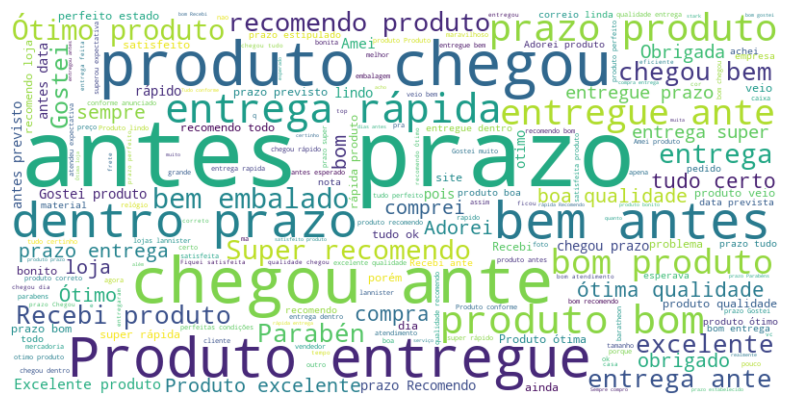

In [48]:
# Word cloud de comentários de produtos com boa avaliação
wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_comments_no_stop)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis('off')
plt.show()

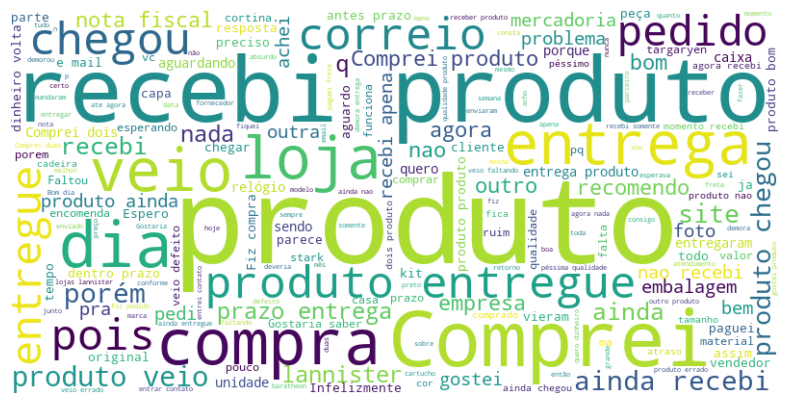

In [49]:
# Word cloud de comentários de produtos com avaliação ruim
wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(bad_comments_no_stop)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.show()